In [1]:
import numpy as np
import pandas as pd

## Data

In [2]:
df = pd.read_csv("00-2-shipman-times-x.csv")
df.head()

,Hour,Shipman,Comparison
0,0,2.6,1.1
1,1,1.0,3.0
2,2,2.6,3.1
3,3,3.0,3.8
4,4,0.3,4.0


In [3]:
# transform data from wide to long format
df_melt = pd.melt(df, id_vars=["Hour"], var_name="dataset", value_name="death_percentage")

df_melt.head()

,Hour,dataset,death_percentage
0,0,Shipman,2.6
1,1,Shipman,1.0
2,2,Shipman,2.6
3,3,Shipman,3.0
4,4,Shipman,0.3


## With Plotly

In [4]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
fig = px.line(df_melt, x="Hour", y="death_percentage", color="dataset")

fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="% of Death",
    title=go.layout.Title(text="Deaths by Hour of Day", xref="paper", x=0),
    annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='From Shipman dataset',
            xref='paper',
            x=0,
            #xshift=275,
            yref='paper',
            y=1.08,
            font=dict(
                #family="Courier New, monospace",
                size=14,
                #color="#0000FF"
            )
        )
    ],
    yaxis = dict(
        tickmode='array',
        tickvals=list(range(0,16,5))
    )
)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=5
)

fig.update_yaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=5,
    range=[0,16]
)

fig.update_traces(line_width=2)

fig

## With Plotnine

In [7]:
from plotnine import *

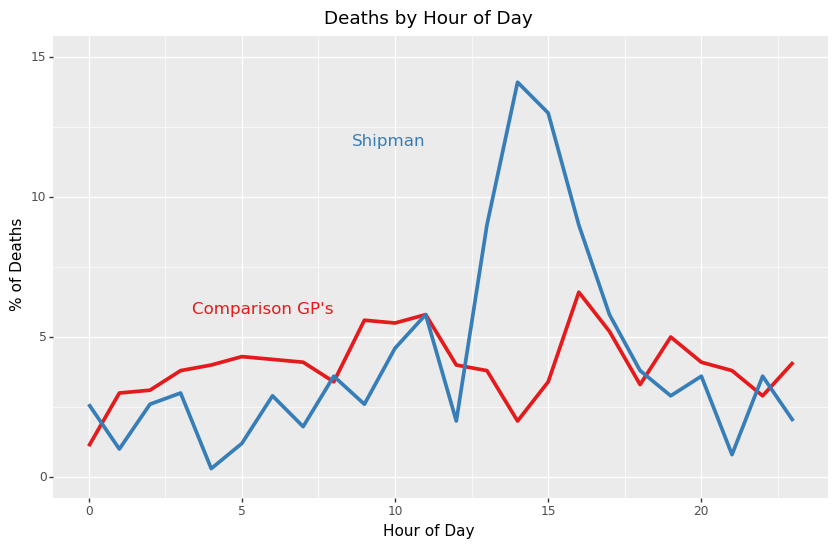

<ggplot: (-9223371924025048604)>

In [23]:
p = ggplot(df, aes(x="Hour")) + ylim(0, 15) # constructs initial plot object, p
p += geom_line(aes(y="Comparison"), size=1.5, color="#e41a1c") # adds a y-series
p += geom_line(aes(y="Shipman"), size=1.5, color="#377eb8") # adds a y-series
p += scale_color_brewer(type="qual", palette="Set1")
p += labs(title="Deaths by Hour of Day", subtitle="From Shipman dataset", y="% of Deaths", x="Hour of Day") # Adds title, subtitle
p += theme(legend_position="none")#, legend.box = "horizontal") # removes the legend

p += annotate('text', x=11, y=12, label='Shipman', fontweight='normal', ha='right', size=12, color="#377eb8")
p += annotate('text', x=8, y=6, label="Comparison GP's", fontweight='normal', ha='right', size=12, color="#e41a1c")

p += theme(figure_size=(10,6))

p